# STK2100 - Mandatory 2
### Håkon Ganes Kornstad

### Oppgave 1

**a)** Figur A består utelukkende av vertikale og horisontale linjer. Hver region er tydelig avgrenset med rette, aksesorienterte kanter. Dette betyr at figur A kan ha blitt produsert av et standard regresjonstre.
Figur B, C og D har derimot følgende problemer:
Figur B: Regionen $C_5$ er ikke rektangulær. Den danner en L-form, noe som ikke kan oppstå med kun én splitt om gangen langs en akse.
Figur C: Det finnes en skrå linje mellom $C_5$ og $C_7$. Dette er umulig i standard regresjonstrær som kun kan lage vertikale eller horisontale snitt.
Figur D: Regionen $C_4$ omringes av andre regioner, og er derfor ikke mulig å skape med en sekvensiell, binær splitting langs én akse av gangen.

**b)** For figur A:
1) $x_1: t = 0.2$
2) $x_2: t = 0.8$
3) $x_1: t = 0.4$
4) $x_2: t = 0.4$
5) $x_1: t = 0.7$

<img src="regressiontree.png" alt="Regression tree" width="500"/>


**c)** 
1) $f(x_1 = 0.6, x_2 = 0.6) = c_4 = 0.3 \cdot 0.4 = 0.12$
2) $f(x_1 = 0.1, x_2 = 0.6) = c_1 = 0.2 \cdot 1.0 = 0.2$
2) $f(x_1 = 0.6, x_2 = 0.1) = c_6 = 0.3 \cdot 0.4 = 0.12$

### Oppgave 2

In [71]:
wage <- read.csv("https://www.uio.no/studier/emner/matnat/math/STK2100/v25/oblig/wage.csv", header = TRUE)

**a)** 

In [72]:
# divide to training and test set, making sure that all the covariates are included
set.seed(050477)
N = nrow(wage)
train = sample(1:N, 1001, replace = FALSE)
train_set = wage[train, ]
test_set = wage[-train, ]


In [73]:
train_set.fit <- lm(wage ~ ., data = train_set)
summary(train_set.fit)


Call:
lm(formula = wage ~ ., data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.194 -19.137  -2.427  13.628 211.492 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2892.4511  1081.4739  -2.675 0.007607 ** 
year                            1.4803     0.5392   2.745 0.006156 ** 
age                             0.3870     0.1040   3.721 0.000209 ***
maritlUnmarried               -15.0432     2.5009  -6.015 2.53e-09 ***
raceOther                      -5.9168     5.2006  -1.138 0.255515    
raceWhite                       2.9736     3.5478   0.838 0.402147    
education2. HS Grad             8.6817     4.0305   2.154 0.031481 *  
education3. Some College       16.6865     4.2729   3.905 0.000101 ***
education4. College Grad       31.8788     4.2969   7.419 2.54e-13 ***
education5. Advanced Degree    55.0578     4.7659  11.552  < 2e-16 ***
jobclass2. Information          0.2542     2.2874   0.111 0.91

Vi ser fra `summary` at kovariatene `raceOther` og særlig `raceWhite` har liten påvirkning på forklaringsvariabelen. Dette kan leses fra t-verdiene som er blant de laveste, med en tilhørende p-verdi $> 0.05$. `jobclass2 Information` har også en veldig liten signifikans. Alle disse variablene er dummyvariabler for klasser med flere kovariater; det kan derfor hende at de bidrar noe mer samlet enn hver for seg. Dette kan utforskes videre med en $anova$-test. Videre kan vi se fra R-squared at modellen forklarer $0.3412$ av variabiliteten i datasettet, og at den samlede p-verdien er $< 2.2e-16$, noe som sier at modellen som helhet har god signifikans i prediksjon av data for treningssettet.

In [74]:
wage.preds <- predict(train_set.fit, newdata = test_set)

actual <- test_set$wage
mse.wage.preds <- mean((wage.preds -actual)^2)
print(mse.wage.preds)

[1] 1182.68


**b)**

In [75]:
library(gam)
library(splines)

train_set.gam <- gam(wage ~ ns(year, df=4) + ns(age, df=4) + . - year - age, data = train_set)
summary(train_set.gam)

wage_gam1.preds <- predict(train_set.gam, newdata = test_set)
wage_gam1.preds.mse <- mean((wage_gam1.preds - actual)^2)
print(wage_gam1.preds.mse)


Call: gam(formula = wage ~ ns(year, df = 4) + ns(age, df = 4) + . - 
    year - age, data = train_set)
Deviance Residuals:
   Min     1Q Median     3Q    Max 
-92.87 -19.31  -2.17  13.79 216.26 

(Dispersion Parameter for gaussian family taken to be 1118.342)

    Null Deviance: 1692893 on 1000 degrees of freedom
Residual Deviance: 1098212 on 982 degrees of freedom
AIC: 9888.154 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                  Df  Sum Sq Mean Sq F value    Pr(>F)    
ns(year, df = 4)   4   14147    3537  3.1626  0.013508 *  
ns(age, df = 4)    4  126385   31596 28.2527 < 2.2e-16 ***
maritl             1   43877   43877 39.2339 5.615e-10 ***
race               2    4720    2360  2.1103  0.121746    
education          4  336315   84079 75.1817 < 2.2e-16 ***
jobclass           1     728     728  0.6512  0.419886    
health             1    9350    9350  8.3606  0.003919 ** 
health_ins         1   59159   59159 52.8987 7.171e-13 ***
Residuals      

[1] 1167.567


**ii)** Splines skal ikke brukes for kvalitative kovariater fordi kvalitative variabler er diskrete og kategoriske uten en naturlig numerisk rekkefølge. Splines krever kontinuitet og en naturlig numerisk orden, noe som ikke eksisterer for kategoriske variabler

**iii)** Ut fra `summary` ser vi at `year` har en lavere F-verdi på 3.16 og p-verdi på 0.013 som er statistisk signifikant, men relativt svak sammenlignet med andre kovariater. `age` er svært signifikant når den er modellert med natural splines, noe som tyder på en ikke-lineær sammenheng med `wage`. Men for `year` er det kanskje ikke en komplisert ikke-lineær sammenheng med `wage`, og vi kan prøve oss med en lineær.

In [76]:
train_set.gam.1 <- gam(wage ~ ns(age, df=4) + . - age, data = train_set)
summary(train_set.gam.1)

wage_gam2.preds <- predict(train_set.gam.1, newdata = test_set)
wage_gam2.preds.mse <- mean((wage_gam2.preds - actual)^2)
print(wage_gam2.preds.mse)


Call: gam(formula = wage ~ ns(age, df = 4) + . - age, data = train_set)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-92.236 -19.241  -2.251  14.170 215.167 

(Dispersion Parameter for gaussian family taken to be 1116.219)

    Null Deviance: 1692893 on 1000 degrees of freedom
Residual Deviance: 1099476 on 985 degrees of freedom
AIC: 9883.306 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                 Df  Sum Sq Mean Sq F value    Pr(>F)    
ns(age, df = 4)   4  128430   32108 28.7646 < 2.2e-16 ***
year              1    7291    7291  6.5317  0.010746 *  
maritl            1   44303   44303 39.6905 4.479e-10 ***
race              2    4810    2405  2.1547  0.116486    
education         4  338691   84673 75.8566 < 2.2e-16 ***
jobclass          1     870     870  0.7799  0.377398    
health            1    9323    9323  8.3519  0.003937 ** 
health_ins        1   59699   59699 53.4832 5.396e-13 ***
Residuals       985 1099476    1116          

[1] 1164.058


Vi ser at vi får minst like godt resultat for lineær `year`, og dette gir en enklere, mer tolkabar modell som har mindre varians, og følgelig mindre sjanse for overtrening. Videre gir den den beste signifikansen ($p=0.0107$) så langt for `year`-variabelen. Dette tyder på at akkurat `year` er en enkel variabel som er godt egnet for lineær modellering.

In [79]:
train_set.gam2 <- gam(wage ~ ns(age, df=4) + . - age - race - jobclass, data = train_set)
summary(train_set.gam2)

wage.preds.2 <- predict(train_set.gam2, newdata = test_set)

mse.wage.gam2.preds <- mean((wage.preds.2 -actual)^2)
print(mse.wage.gam2.preds)


Call: gam(formula = wage ~ ns(age, df = 4) + . - age - race - jobclass, 
    data = train_set)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-91.492 -19.462  -2.606  13.923 213.540 

(Dispersion Parameter for gaussian family taken to be 1118.636)

    Null Deviance: 1692893 on 1000 degrees of freedom
Residual Deviance: 1105213 on 988 degrees of freedom
AIC: 9882.515 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                 Df  Sum Sq Mean Sq F value    Pr(>F)    
ns(age, df = 4)   4  128430   32108 28.7024 < 2.2e-16 ***
year              1    7291    7291  6.5176  0.010831 *  
maritl            1   44303   44303 39.6048 4.667e-10 ***
education         4  335238   83809 74.9211 < 2.2e-16 ***
health            1    9885    9885  8.8366  0.003024 ** 
health_ins        1   62533   62533 55.9015 1.678e-13 ***
Residuals       988 1105213    1119                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 1162.123


**(iv)** Da vi fjernet kovariablene `jobclass` og `race` så vi at MSE ikke forbedret seg vesentlig, men dette betyr også at disse to kovariatene ikke var signifikante, og hadde heller ingen negativ effekt.

**c)** Fitting a regression tree to the original data

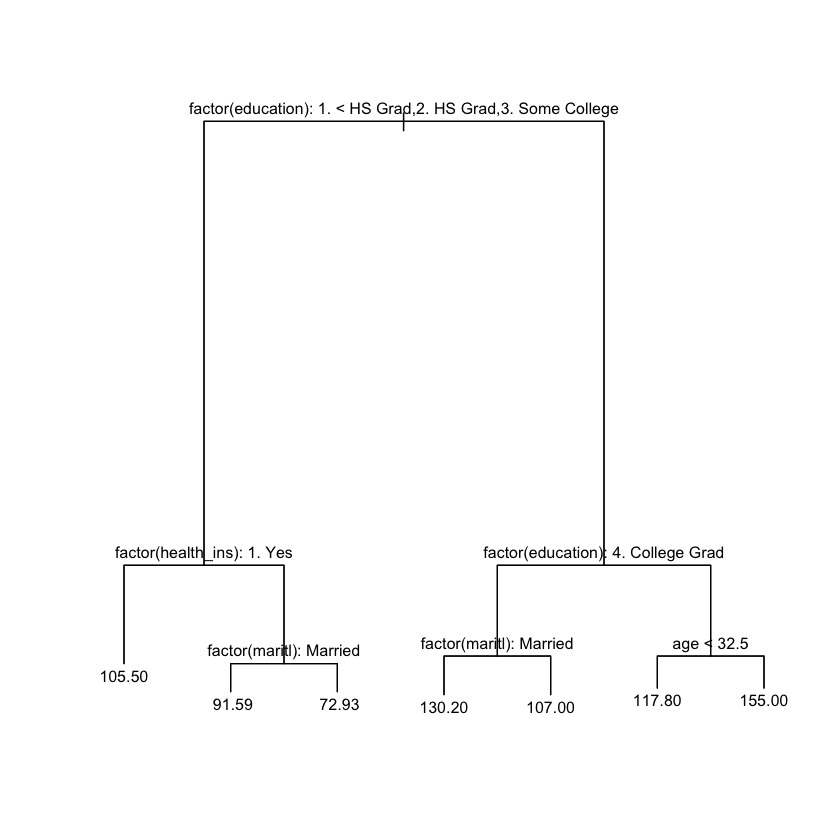

In [89]:
library(tree)
train_set.tree <- tree(wage ~ year + age + factor(education) + factor(health_ins) + factor(maritl) + factor(jobclass) + factor(race) + factor(health), data = train_set)


par(bg="white")
plot(train_set.tree)
text(train_set.tree, pretty=0, cex=0.8)

Vi ser at variablene `education`, `health_ins`, `maritl` og `age` er viktige bidragsytere i regresjonstreet. Dette stemmer godt med resultatene fra regresjonsmodellene **(a og b)**. I regresjonstreet vises imidlertid ikke variablene `year`, `race`, `jobclass`, eller `health`. Selv om variabelen health faktisk var signifikant i regresjonsmodellene, velges den ikke i treet. Dette skyldes sannsynligvis at treet prioriterer variabler som gir tydelige og raske forbedringer av prediksjonen. Variabelen year var moderat signifikant i regresjonsmodellene, men her viser treet at andre variabler gir bedre splitting og dermed bedre prediktiv verdi.

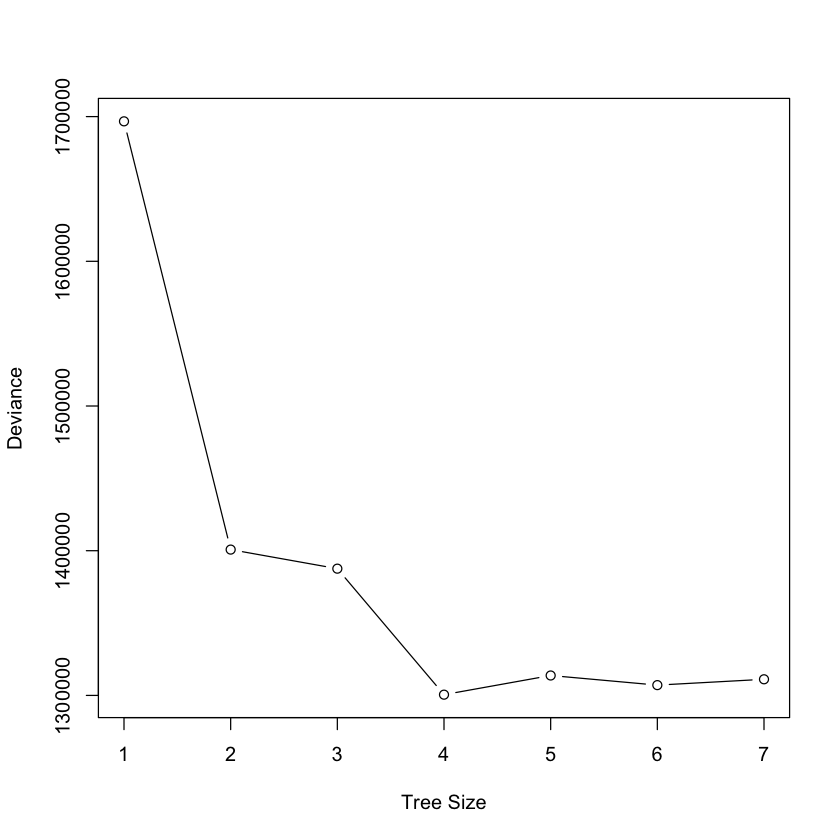

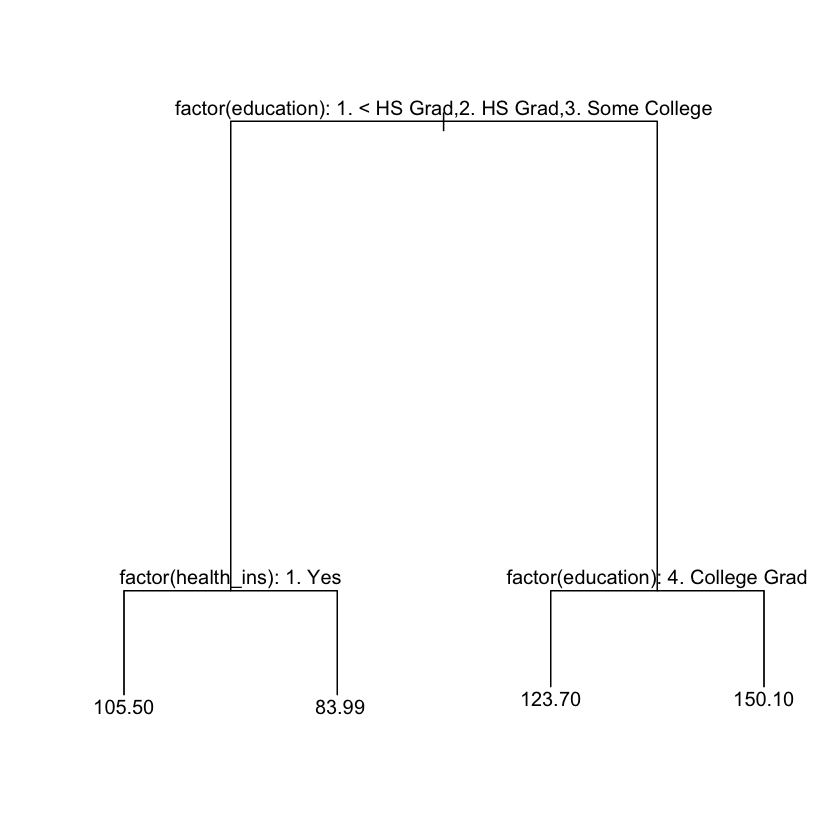

In [101]:
set.seed(1)
cv.result <- cv.tree(train_set.tree, K=10) # K=10 er 10-fold CV
par(bg="white")
plot(cv.result$size, cv.result$dev, type="b", xlab="Tree Size", ylab="Deviance")

# finding best tree size based on deviance
optimal.size <- cv.result$size[which.min(cv.result$dev)]

# using the optimal size
pruned.tree <- prune.tree(train_set.tree, best=optimal.size)
par(bg="white")
plot(pruned.tree)
text(pruned.tree, pretty=0)


Vi ser at treet etter pruning med 10-fold cross-validation har blitt redusert til kun 4 løvnoder. Nå brukes bare variablene `education` og `health_ins`, noe som er færre variabler enn tidligere. Variabelen `maritl` og `age`, som var med i det opprinnelige treet, har blitt fjernet etter pruningen.
Dette betyr at modellen etter pruning er betydelig enklere, noe som antyder at disse to variablene alene (`education` og `health_ins`) er tilstrekkelig for en robust prediksjon. Modellen er dermed omtrent halvparten så stor som det originale treet, noe som reduserer risiko for overtrening.

**iii)**

In [104]:
preds.tree <- predict(train_set.tree, newdata=test_set)
actual <- test_set$wage
mse.tree <- mean((actual - preds.tree)^2)
cat("MSE on regular tree:", mse.tree, "\n")

MSE on regular tree: 1297.31 


In [105]:
preds.tree.pruned <- predict(pruned.tree, newdata=test_set)
mse.tree.pruned <- mean((actual - preds.tree.pruned)^2)
cat("MSE on pruned tree:", mse.tree.pruned, "\n")

MSE on pruned tree: 1338.695 


Vi ser at MSE for regresjonstreet ($1297.31$) og det prunede treet ($1338.695$) er vesentlig høyere enn både den lineære regresjonsmodellen og GAM-modellen vi tidligere evaluerte (begge hadde MSE rundt $1164$). Dette viser at regresjonstrærne gir dårligere prediksjonsevne på testdataene. Selv om trær er enkle å tolke og har lavere varians, har de her blitt for enkle og lider dermed av høy bias (undertilpasning).
På bakgrunn av dette er GAM-modellen med én lineær kvantitativ variabel (`year` lineær) og én natural cubic spline (`age`, $df=4$), samt to fjernede variabler (`race` og `jobclass`), klart å foretrekke. Denne modellen gir best prediksjonsytelse (laveste MSE) og en god balanse mellom fleksibilitet og tolkbarhet.

### Oppgave 3

**a)**

In [108]:
vert <- read.csv("https://www.uio.no/studier/emner/matnat/math/STK2100/v25/oblig/vertebral-column.csv", header=TRUE)
head(vert)

,pelvInc,pelvTilt,lumbLord,SacrSl,pelvRad,degrS,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,63.03,22.55,39.61,40.48,98.67,-0.25,1
2,39.06,10.06,25.02,29.00,114.41,4.56,1
3,68.83,22.22,50.09,46.61,105.99,-3.53,1
4,69.30,24.65,44.31,44.64,101.87,11.21,1
5,49.71,9.65,28.32,40.06,108.17,7.92,1
6,40.25,13.92,25.12,26.33,130.33,2.23,1


**i)**

In [119]:
# checking the distribution of the classes
table(vert$class)

set.seed(050477)
ind_class1 <- which(vert$class == 1)
ind_class2 <- which(vert$class != 1)
n_class1 <- length(ind_class1)
n_class2 <- length(ind_class2)

# choosing 2/3 for training for each class
train_class1 <- sample(ind_class1, size=ceiling((2/3)*n_class1))
train_class2 <- sample(ind_class2, size=ceiling((2/3)*n_class2))
train_indices <- c(train_class1, train_class2)
vert.train <- vert[train_indices, ]
vert.test <- vert[-train_indices, ]

prop.table(table(vert.train$class))
prop.table(table(vert.test$class))


  0   1 
100 210 


        0         1 
0.3236715 0.6763285 


        0         1 
0.3203883 0.6796117 

**ii)**

In [124]:
fit.vert.logit <- glm(class ~ ., family=binomial(link = logit), data=vert.train)
summary(fit.vert.logit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = class ~ ., family = binomial(link = logit), data = vert.train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.687201   4.304646   4.109 3.98e-05 ***
pelvInc     -27.693483  44.964657  -0.616    0.538    
pelvTilt     27.776156  44.974632   0.618    0.537    
lumbLord     -0.006355   0.030127  -0.211    0.833    
SacrSl       27.568910  44.966640   0.613    0.540    
pelvRad      -0.124631   0.029800  -4.182 2.89e-05 ***
degrS         0.192429   0.032021   6.009 1.86e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 260.66  on 206  degrees of freedom
Residual deviance: 110.96  on 200  degrees of freedom
AIC: 124.96

Number of Fisher Scoring iterations: 8


Når man ser på denne modellen med `summary()`, viser kovariatene `pelvInc` og `lumbLord` ingen signifikant effekt ($p < 0.05$). Koeffisientene deres er negative, noe som indikerer at de snarere bidrar til bedre helse enn uhelse. Men vi kan ikke konkludere noe om denne effekten, siden de er så insignifikante. Kovariatene `pelvTilt` og `SacrSl` ser også ut til å være insignifikante i positiv retning (økt risiko), med lave z-verdier og en høy p-verdi $> 0.05$. Fra denne logistiske regresjonsmodellen ser det kun ut som `pelvRad` og `degrS` bidrar signifikant, der `pelvRad` minker og `degrS` øker risikoen for sykdom.

**iii)**

In [118]:
vert.preds.prob <- predict(fit.vert.logit, newdata = vert.test, type = "response")
vert.preds <- ifelse(vert.preds.prob >= 0.5, 1, 0)

mean_misclass_error <- mean(vert.preds != vert.test$class)
mean_misclass_error


[1] 0.1456311

**b) i)**

In [122]:
library(MASS)
fit.vert.lda <- lda(class ~ ., data = vert.train)
print(fit.vert.lda)

Call:
lda(class ~ ., data = vert.train)

Prior probabilities of groups:
        0         1 
0.3236715 0.6763285 

Group means:
   pelvInc pelvTilt lumbLord   SacrSl  pelvRad     degrS
0 51.74149 12.98955 43.00642 38.75194 125.0661  2.334776
1 64.48750 19.36436 55.97786 45.12371 115.3861 37.589214

Coefficients of linear discriminants:
                  LD1
pelvInc  -14.29364131
pelvTilt  14.31680297
lumbLord   0.02011586
SacrSl    14.25897295
pelvRad   -0.05768708
degrS      0.02081701


**b) ii)**

In [125]:
vert.lda.pred <- predict(fit.vert.lda, newdata = vert.test)
y.hat.lda <- vert.lda.pred$class

lda_misclass_error <- mean(y.hat.lda != vert.test$class)
print(lda_misclass_error)

[1] 0.1747573


**c) i)** 

In [127]:
fit.vert.qda <- qda(class ~ ., data = vert.train)
print(fit.vert.qda)

Call:
qda(class ~ ., data = vert.train)

Prior probabilities of groups:
        0         1 
0.3236715 0.6763285 

Group means:
   pelvInc pelvTilt lumbLord   SacrSl  pelvRad     degrS
0 51.74149 12.98955 43.00642 38.75194 125.0661  2.334776
1 64.48750 19.36436 55.97786 45.12371 115.3861 37.589214


In [128]:
vert.qda.pred <- predict(fit.vert.qda, newdata = vert.test)
y.hat.qda <- vert.qda.pred$class

qda_misclass_error <- mean(y.hat.qda != vert.test$class)
print(qda_misclass_error)

[1] 0.2135922


Etter kjøring med både LDA og QDA ser vi at begge presterer dårligere enn vår ordinære logistisk regresjonsmodell. Når vi observerer at LDA-modellen presterer dårligere enn logistisk regresjon på testsettet, tyder det på at antakelsen til LDA om lik kovariansmatrise i begge klassene ikke er helt riktig i dette datasettet. Dataene er sannsynligvis ikke godt beskrevet av en modell som krever at variablene oppfører seg helt likt (i forhold til varians og kovarians) innenfor hver gruppe.

Når QDA (som ikke gjør denne antakelsen) presterer enda dårligere enn LDA, er årsaken sannsynligvis at modellen blir for kompleks (har for mange parametere) og dermed tilpasser seg "for godt" til treningsdataene (overtilpassing), noe som fører til dårligere ytelse på testsettet. Derfor passer den logistiske regresjonen, som ikke krever eksplisitte antakelser om kovariansmatriser, bedre for disse dataene.

**d) i)**

**ii)**

In [139]:
library(nnet)

# standardiserer dataene (alle bortsett fra kolonne 7 som er class)
vert.train.scaled <- vert.train
vert.test.scaled <- vert.test

vert.train.scaled[, -7] <- scale(vert.train[, -7])
vert.test.scaled[, -7] <- scale(vert.test[, -7], 
                                center = attr(scale(vert.train[, -7]), "scaled:center"), 
                                scale = attr(scale(vert.train[, -7]), "scaled:scale"))

# konverterer klasse til faktor
vert.train.scaled$class <- factor(vert.train.scaled$class)
vert.test.scaled$class <- factor(vert.test.scaled$class)

set.seed(050477)

# setter parametere vi vil teste på
sizes <- c(1, 3, 5, 7, 10)
decays <- c(0, 0.001, 0.01, 0.1, 0.5)

# beholdere for å lagre beste resultat
best_error <- Inf
best_size <- NA
best_decay <- NA
best_model <- NULL

# trenings-loop
for (size in sizes) {
  for (decay in decays) {
    cat("Trener modell med size =", size, "og decay =", decay, "\n")
    
    nn.model <- nnet(class ~ ., 
                     data = vert.train.scaled, 
                     size = size, 
                     decay = decay, 
                     maxit = 500, 
                     linout = FALSE, 
                     trace = FALSE)
    
    # predikerer på testsettet
    preds <- predict(nn.model, newdata = vert.test.scaled, type = "class")
    
    # beregner feil
    error <- mean(preds != vert.test.scaled$class)
    cat("Misclassification error:", error, "\n\n")
    
    # lagrer den beste modellen
    if (error < best_error) {
      best_error <- error
      best_size <- size
      best_decay <- decay
      best_model <- nn.model
    }
  }
}

cat("Beste modell:\n")
cat("Size =", best_size, ", Decay =", best_decay, ", Misclassification Error =", best_error, "\n")


Trener modell med size = 1 og decay = 0 
Misclassification error: 0.1456311 

Trener modell med size = 1 og decay = 0.001 
Misclassification error: 0.1359223 

Trener modell med size = 1 og decay = 0.01 
Misclassification error: 0.1359223 

Trener modell med size = 1 og decay = 0.1 
Misclassification error: 0.1359223 

Trener modell med size = 1 og decay = 0.5 
Misclassification error: 0.1553398 

Trener modell med size = 3 og decay = 0 
Misclassification error: 0.1553398 

Trener modell med size = 3 og decay = 0.001 
Misclassification error: 0.1650485 

Trener modell med size = 3 og decay = 0.01 
Misclassification error: 0.1165049 

Trener modell med size = 3 og decay = 0.1 
Misclassification error: 0.1456311 

Trener modell med size = 3 og decay = 0.5 
Misclassification error: 0.1553398 

Trener modell med size = 5 og decay = 0 
Misclassification error: 0.1553398 

Trener modell med size = 5 og decay = 0.001 
Misclassification error: 0.184466 

Trener modell med size = 5 og decay = 0

Det nevrale nettverket presterer betydelig bedre enn det logistiske, og det kan tyde på at vi har ikke-lineære sammenhenger mellom kovariatene og klassen. Siden vi satt opp en optimaliseringsalgoritme med flere muligheter for størrelse og decay, har vi klart å finne en modell som er kompleks nok til å fange opp denne ikke-lineariteten, men samtidig være godt nok regulert til å unngå overtilpasning.